In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from DS_models_stat import cut_cat, make_histogram

In [4]:
true_cat_dict = {
    '6' : cut_cat(pd.read_csv('/home/rt2122/Data/SRGz/clusters/clusters1_east_val_edit.csv'), big_pix=[6]),
    '38' : cut_cat(pd.read_csv('/home/rt2122/Data/SRGz/clusters/clusters1_east_val_edit.csv'), big_pix=[38]),
    #'east_val' : pd.read_csv('/home/rt2122/Data/SRGz/clusters/clusters1_east_val_edit.csv'),
    'east' : pd.read_csv('/home/rt2122/Data/SRGz/clusters/clusters1_b20_edit.csv')
    }

for name in true_cat_dict:
    df = true_cat_dict[name]
    df.rename(columns={'flux_05-20' : 'flux'}, inplace=True)
    df['log'] = np.log(df['flux'])
    df['log10'] = np.log10(df['flux'])
    df['exp'] = np.exp(df['flux'])


In [7]:
counts = {}
bins = {}
n_bins = 20
for prm in ['flux', 'log', 'exp', 'log10']:
    counts[prm] = {}
    
    df = true_cat_dict['east']
    minv = df[prm].min()
    maxv = df[prm].max()
    dif = (maxv-minv)/n_bins
    b = np.arange(minv, maxv+dif, dif)
    bins[prm] = b
    for name in true_cat_dict:
        df = true_cat_dict[name]
        c, _ = np.histogram(df[prm], b)
        counts[prm][name] = c

Text(0.5, 69.0, 'flux')

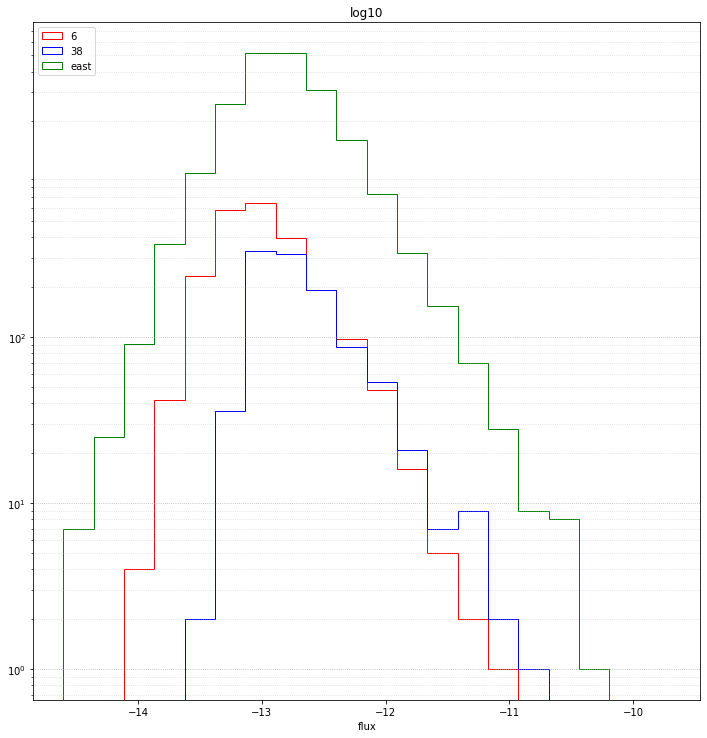

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.tight_layout()
prm='log10'
make_histogram(ax, list(counts[prm].values()), bins[prm], label_list=list(counts[prm].keys()), title=prm, log=True)
ax.set_yticks([10 ** i for i in range(3)])
ax.grid(axis='y', which='major', linestyle=':', alpha=1)
ax.grid(axis='y', which='minor', linestyle=':', alpha=0.5)
ax.set_xlabel('flux')

In [12]:
d = {'a' : 1, 'b' : 2}
list(d.keys()), list(d.values())

(['a', 'b'], [1, 2])